In [1]:
from pandas import DataFrame, Series
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_POS = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv', na_values=['','XNA','XAP'])

In [3]:
len(df_POS)

10001358

In [4]:
df_POS['SK_ID_CURR'].nunique()

337252

In [5]:
df_POS[:10]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [6]:
((df_POS.isnull().sum() / len(df_POS))*100).sort_values(ascending = False)

CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
NAME_CONTRACT_STATUS     0.000020
SK_DPD_DEF               0.000000
SK_DPD                   0.000000
MONTHS_BALANCE           0.000000
SK_ID_CURR               0.000000
SK_ID_PREV               0.000000
dtype: float64

In [7]:
df_POS[df_POS['CNT_INSTALMENT_FUTURE'].isnull()]['CNT_INSTALMENT'].value_counts()

12.0    43
6.0     25
4.0     24
10.0    18
24.0     3
Name: CNT_INSTALMENT, dtype: int64

In [8]:
df_POS[df_POS['CNT_INSTALMENT'].isnull()]['CNT_INSTALMENT_FUTURE'].value_counts()

12.0    27
6.0     22
10.0    16
18.0     6
4.0      6
24.0     6
48.0     4
60.0     3
36.0     3
8.0      2
14.0     1
30.0     1
Name: CNT_INSTALMENT_FUTURE, dtype: int64

count    9.975287e+06
mean     1.708965e+01
std      1.199506e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      9.200000e+01
Name: CNT_INSTALMENT, dtype: float64

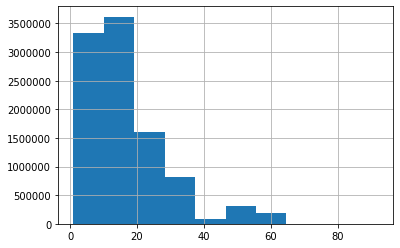

In [9]:
df_POS['CNT_INSTALMENT'].hist()
df_POS['CNT_INSTALMENT'].describe()

In [10]:
df_POS[df_POS['CNT_INSTALMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()
# Most null values have only "signed" contracts or other non-active contracts
# likely indicating term undecided
# fill with median

Signed                   20266
Returned to the store     2961
Approved                  2804
Active                      26
Canceled                    12
Name: NAME_CONTRACT_STATUS, dtype: int64

In [11]:
df_POS['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
Name: NAME_CONTRACT_STATUS, dtype: int64

In [12]:
df_POS['CNT_INSTALMENT_FUTURE'].value_counts() # fill with 0's

0.0     1185960
6.0      614058
4.0      613632
5.0      600295
3.0      582007
2.0      547199
1.0      512279
10.0     481390
8.0      480167
7.0      472665
9.0      467606
12.0     389585
11.0     376430
18.0     165735
17.0     159457
16.0     157022
15.0     151212
14.0     150588
13.0     143572
24.0     136742
23.0     130810
22.0     126621
21.0     122275
20.0     119339
19.0     115024
36.0      55228
30.0      53102
35.0      52659
34.0      50869
29.0      50258
         ...   
60.0      14476
59.0      13775
58.0      13389
57.0      12665
56.0      11980
54.0      11530
55.0      11154
53.0      10421
52.0       9482
51.0       8725
50.0       7951
49.0       7278
61.0         41
72.0         35
71.0         33
69.0         32
70.0         32
66.0         30
68.0         30
67.0         28
65.0         27
64.0         26
62.0         25
63.0         25
85.0          1
80.0          1
81.0          1
82.0          1
83.0          1
84.0          1
Name: CNT_INSTALMENT_FUT

In [13]:
df_POS[df_POS['CNT_INSTALMENT'].isnull()&df_POS['CNT_INSTALMENT_FUTURE'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
759,1618886,382448,-2,NaN,NaN,Signed,0,0
1887,2288203,429576,-6,NaN,NaN,Signed,0,0
1899,2110224,167171,-6,NaN,NaN,Signed,0,0
1910,2031967,235187,-5,NaN,NaN,Signed,0,0
3376,1683317,185455,-44,NaN,NaN,Signed,0,0
5802,2619122,340969,-4,NaN,NaN,Returned to the store,0,0
7540,2770178,282094,-33,NaN,NaN,Signed,0,0
8119,1910110,278474,-33,NaN,NaN,Signed,0,0
8629,1112804,251721,-10,NaN,NaN,Signed,0,0


In [14]:
df_POS[df_POS['NAME_CONTRACT_STATUS'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1614508,1378042,142208,-21,NaN,NaN,NaN,0,0
1614509,1711630,309000,-24,NaN,NaN,NaN,0,0


In [15]:
df_POS['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', nan,
       'Amortized debt'], dtype=object)

In [16]:
df_POS.corr(method="pearson")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,-0.000336,0.001835,0.003820,0.003679,-0.000487,0.004848
SK_ID_CURR,-0.000336,1.000000,0.000404,0.000144,-0.000559,0.003118,0.001948
MONTHS_BALANCE,0.001835,0.000404,1.000000,0.336163,0.271595,-0.018939,-0.000381
CNT_INSTALMENT,0.003820,0.000144,0.336163,1.000000,0.871276,-0.060803,-0.014154
CNT_INSTALMENT_FUTURE,0.003679,-0.000559,0.271595,0.871276,1.000000,-0.082004,-0.017436
SK_DPD,-0.000487,0.003118,-0.018939,-0.060803,-0.082004,1.000000,0.245782
SK_DPD_DEF,0.004848,0.001948,-0.000381,-0.014154,-0.017436,0.245782,1.000000


In [17]:
df_POS[df_POS['SK_ID_PREV']==1770932].sort_values(by='MONTHS_BALANCE', ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9998257,1770932,441177,-1,6.0,3.0,Active,0,0
9997591,1770932,441177,-2,6.0,4.0,Active,0,0
9999364,1770932,441177,-3,6.0,5.0,Active,0,0
9998606,1770932,441177,-4,6.0,6.0,Active,0,0
9999511,1770932,441177,-5,NaN,NaN,Signed,0,0
9998615,1770932,441177,-6,NaN,NaN,Signed,0,0
9998578,1770932,441177,-7,NaN,NaN,Signed,0,0
9999114,1770932,441177,-8,NaN,NaN,Signed,0,0
9999116,1770932,441177,-9,NaN,NaN,Signed,0,0
9998668,1770932,441177,-10,NaN,NaN,Signed,0,0


In [18]:
df_POS['SK_DPD'].value_counts()

0       9706131
1         21872
2         17358
3         14403
4         12350
5         11046
6          9615
7          8332
8          7360
9          6668
10         6049
11         5392
12         4907
13         4468
14         3944
15         3438
16         3169
17         2980
18         2759
19         2532
20         2322
21         1996
22         1820
23         1586
24         1386
25         1258
26         1101
27          923
28          864
29          700
         ...   
3373          1
3377          1
3301          1
3296          1
3238          1
3292          1
3241          1
3240          1
3242          1
3244          1
3247          1
3246          1
3248          1
3253          1
3025          1
3259          1
3265          1
3264          1
3267          1
3269          1
3270          1
3273          1
3272          1
3275          1
3277          1
3278          1
3280          1
3282          1
3284          1
4231          1
Name: SK_DPD, Length: 34